# 「こころ」でWord2Vec
- コールバックなどの確認

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.style.use('ggplot')

In [2]:
import pandas as pd


In [3]:
random_state = 12345

In [4]:
data = pd.read_csv('こころ_形態素.csv', index_col=0)

In [5]:
data

,テキスト,部,章,章（ラベル）,テキスト_形態素
0,私はその人を常に先生と呼んでいた。だからここでもただ先生と書くだけで本名は打ち明けない。こ...,[1]上＿先生と私,1_01,上・一,"['私', 'は', 'その', '人', 'を', '常に', '先生', 'と', '呼..."
1,私が先生と知り合いになったのは鎌倉である。その時私はまだ若々しい書生であった。暑中休暇を利...,[1]上＿先生と私,1_01,上・一,"['私', 'が', '先生', 'と', '知り合い', 'に', 'なる', 'た', ..."
2,学校の授業が始まるにはまだ大分日数があるので鎌倉におってもよし、帰ってもよいという境遇にい...,[1]上＿先生と私,1_01,上・一,"['学校', 'の', '授業', 'が', '始まる', 'に', 'は', 'まだ', ..."
3,宿は鎌倉でも辺鄙な方角にあった。玉突きだのアイスクリームだのというハイカラなものには長い畷...,[1]上＿先生と私,1_01,上・一,"['宿', 'は', '鎌倉', 'で', 'も', '辺鄙', 'だ', '方角', 'に..."
4,私は毎日海へはいりに出掛けた。古い燻ぶり返った藁葺の間を通り抜けて磯へ下りると、この辺にこ...,[1]上＿先生と私,1_01,上・一,"['私', 'は', '毎日', '海', 'へ', 'はいる', 'に', '出掛ける',..."
...,...,...,...,...,...
1210,それから二、三日して、私はとうとう自殺する決心をしたのです。私に乃木さんの死んだ理由がよく...,[3]下＿先生と遺書,3_56,下・五十六,"['それから', '二', '三', '日', 'する', 'て', '私', 'は', '..."
1211,私は妻を残して行きます。私がいなくなっても妻に衣食住の心配がないのは仕合せです。私は妻に残...,[3]下＿先生と遺書,3_56,下・五十六,"['私', 'は', '妻', 'を', '残す', 'て', '行く', 'ます', '私..."
1212,私が死のうと決心してから、もう十日以上になりますが、その大部分はあなたにこの長い自叙伝の一...,[3]下＿先生と遺書,3_56,下・五十六,"['私', 'が', '死ぬ', 'う', 'と', '決心', 'する', 'て', 'か..."
1213,しかし私は今その要求を果たしました。もう何にもする事はありません。この手紙があなたの手に落...,[3]下＿先生と遺書,3_56,下・五十六,"['しかし', '私', 'は', '今', 'その', '要求', 'を', '果たす',..."


In [6]:
word_list = data['テキスト_形態素'].apply(eval)  # str -> list へ変換

In [7]:
word_list = list(word_list)

In [8]:
#word_list

In [9]:
len(word_list)

1215

In [10]:
# Word2Vecライブラリの導入
#!sudo /opt/conda/bin/python -m pip install gensim

In [11]:
# Word2Vecライブラリのロード
from gensim.models import word2vec

In [12]:
# Word2Vec用のCallback
from gensim.models.callbacks import CallbackAny2Vec

class EpochLogger(CallbackAny2Vec):
    '''Callback to log information about training'''

    def __init__(self, print_interval=5):
        self.epoch = 0
        self.train_loss = []
        self.print_interval = print_interval

    def on_epoch_begin(self, model):
#        print("Epoch #{} start".format(self.epoch))
        pass

    def on_epoch_end(self, model):
        # Notice:
        #  Current value of get_latest_training_loss may be incorrect.
        #  See pull-request below:
        #  Fix computation of `Word2Vec` loss & add loss value to logging string
        #  https://github.com/RaRe-Technologies/gensim/pull/2135
        #
        #  See also:
        #  https://stackoverflow.com/questions/52038651/loss-does-not-decrease-during-training-word2vec-gensim

        _loss = model.get_latest_training_loss()
        self.train_loss.append(_loss)
        if self.epoch % self.print_interval == 0:
            print("Epoch #{} end (Loss: {:,.2f})".format(self.epoch, _loss))
        self.epoch += 1
        

Epoch #0 end (Loss: 68,970.83)
Epoch #50 end (Loss: 2,382,598.00)
Epoch #100 end (Loss: 3,953,451.00)
Epoch #150 end (Loss: 5,217,553.50)


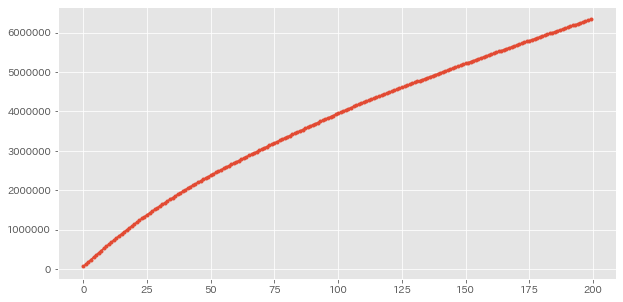

In [13]:
# size: 圧縮次元数
# min_count: 出現頻度の低いものをカットする
# window: 前後の単語を拾う際の窓の広さを決める
# iter: 機械学習の繰り返し回数(デフォルト:5)十分学習できていないときにこの値を調整する
# model.wv.most_similarの結果が1に近いものばかりで、model.dict['wv']のベクトル値が小さい値ばかりの 
# ときは、学習回数が少ないと考えられます。
# その場合、iterの値を大きくして、再度学習を行います。

w2v_params = {
    'size': 100,
    'min_count': 1,
    'window': 15,
    'iter': 200,
    'compute_loss': True,
    'seed': random_state,
}

print_interval = 50
epoch_logger = EpochLogger(print_interval=print_interval)

# 事前準備したword_listを使ってWord2Vecの学習実施
#model = word2vec.Word2Vec(word_list, size=100,min_count=5,window=5,iter=100)
model = word2vec.Word2Vec(word_list, **w2v_params, callbacks=[epoch_logger])


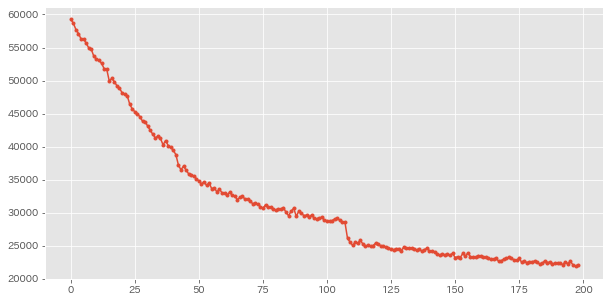

In [19]:
train_loss = np.array(epoch_logger.train_loss)
#train_loss

diff_loss = train_loss[1:] - train_loss[:-1]  # 1epoch前からの増分

# lossの可視化
plt.figure(figsize=(10, 5))

#X = np.arange(len(train_loss))
#plt.plot(train_loss, marker='.')
plt.plot(diff_loss, marker='.')


In [14]:
# 結果の確認1
# 一つ一つの単語は100次元のベクトルになっています。 
# 「世間」のベクトル値を確認します。
# model.wv['世間'] としてもほぼ同じ
print(model.__dict__['wv']['世間'])

[-2.1535463   0.79984194  1.9758185   0.6151357   1.7426682   4.878612
  3.8134997   4.185735    3.0209463  -0.9434321   0.13754557  0.5158944
  2.2030325  -0.2363283  -3.0568972  -2.6018112   5.517231    0.48325735
 -0.47367507 -3.4029088   0.12444004  1.9842751  -0.05913954 -3.8647878
 -3.1779282  -2.3866267  -1.5422364   1.719806    0.1646499  -6.124587
 -0.05532982 -1.68722     4.7848134   0.00854415 -0.9050269  -1.9214383
 -3.4465463   1.1137102  -3.5186758  -0.64143074 -1.3900635  -0.07004364
  1.8041136   0.80034864 -2.2277217  -2.6152647  -4.5280914   2.9723434
  1.5978955   2.789896    2.0374467  -0.46516308 -4.1379213  -1.1098114
 -0.9961981   0.7873702  -2.976896   -0.40609148 -2.7410653   2.4981103
  0.6247989   0.6965455  -0.46960026 -0.28181762  1.7644837  -5.3335814
  1.7714405   1.0719012   0.40609768 -1.9459951  -0.7773248   2.4338791
  1.1267451   3.6939282  -1.2041212   0.7726972   4.5448856   0.42680168
  2.8523202   1.8879802   0.47027892 -2.1473742  -0.65057904  0

In [15]:
# 結果の確認2
# 関数most_similarを使って「世間」の類似単語を調べます 
ret = model.wv.most_similar(positive=['世間']) 
for item in ret:
    print(item[0], item[1])

先輩 0.4004974961280823
厳重 0.3756759762763977
評する 0.36807847023010254
意見 0.36400389671325684
これから 0.3615782856941223
見地 0.35934212803840637
純 0.3544793128967285
著名 0.3403777480125427
もっと 0.3393193185329437
平凡 0.3340153396129608


In [16]:
ret = model.wv.most_similar(positive=['人間']) 
for item in ret:
    print(item[0], item[1])

悪人 0.4045700430870056
み 0.37212124466896057
憚 0.35754120349884033
変化 0.3537025451660156
問題 0.3343837261199951
犠牲 0.3309716582298279
幸福 0.32783043384552
善人 0.3143073320388794
充ちる 0.31339123845100403
近づく 0.31031543016433716
